In [2]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pylab as plt
from langdetect import detect

In [39]:
df=pd.read_csv("D:\\INSEA\\Stage PFA\\Stage Ministère de finance\\data\\reviews\\reviews_classed.csv")
df1=pd.read_csv("D:\\INSEA\\Stage PFA\\Stage Ministère de finance\\data\\reviews\\reviews_month_imputed.csv")
df3=pd.read_csv("D:\\INSEA\\Stage PFA\\Stage Ministère de finance\\data\\reviews\\reviews_classed22.csv")
dff=pd.read_csv("D:\\INSEA\\Stage PFA\\Stage Ministère de finance\\data\\tourism\\Nuite_par_destination.csv")
df2=pd.read_csv("D:\\INSEA\\Stage PFA\\Stage Ministère de finance\\data\\tourism\\KPI_touristique.csv")
df2=df2.rename(columns={"Date":"date"})

In [65]:
df[df['plateforme']=='Tripadvisor'].isnull().sum()

city                  0
category              0
place_name            0
date                  0
note               2359
review                0
sentiment_label       0
plateforme            0
text                  0
month                 0
sentiment             0
dtype: int64

In [31]:
df1['plateforme'].value_counts()

plateforme
Google Maps    91643
Booking         4693
Tripadvisor     2641
Name: count, dtype: int64

In [48]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2641 entries, 0 to 2640
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             2641 non-null   object 
 1   category         2641 non-null   object 
 2   place_name       2641 non-null   object 
 3   date             2641 non-null   object 
 4   note             0 non-null      float64
 5   review           2359 non-null   object 
 6   sentiment_label  2641 non-null   object 
 7   plateforme       2641 non-null   object 
 8   text             2359 non-null   object 
 9   month            2641 non-null   object 
 10  sentiment        2641 non-null   object 
dtypes: float64(1), object(10)
memory usage: 227.1+ KB


In [51]:
df3['sentiment'].value_counts()

sentiment
positive    1943
negative     375
neutral       41
Name: count, dtype: int64

In [43]:
df3['date'] = df3['date'].fillna(df3['month'])

In [ ]:
df3=df3[df3['sentiment']!='unknown']

<class 'pandas.core.frame.DataFrame'>
Index: 2359 entries, 0 to 2640
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             2359 non-null   object 
 1   category         2359 non-null   object 
 2   place_name       2359 non-null   object 
 3   date             2359 non-null   object 
 4   note             0 non-null      float64
 5   review           2359 non-null   object 
 6   sentiment_label  2359 non-null   object 
 7   plateforme       2359 non-null   object 
 8   text             2359 non-null   object 
 9   month            2359 non-null   object 
 10  sentiment        2359 non-null   object 
dtypes: float64(1), object(10)
memory usage: 221.2+ KB


In [53]:
df

,city,category,place_name,date,note,review,sentiment_label,plateforme,text,month,sentiment
0,Agadir,hotel,Bahia City Hôtel,08/2025,2.0,J’ai été très deçue de l’hotel ! Il n’y a pas ...,neutral,Google Maps,J’ai été très deçue de l’hotel ! Il n’y a pas ...,06/2025,négatif
1,Agadir,hotel,Bahia City Hôtel,08/2025,1.0,Très bon emplacement ! L’hôtel est très vieux ...,neutral,Google Maps,Très bon emplacement ! L’hôtel est très vieux ...,06/2025,négatif
2,Agadir,hotel,Bahia City Hôtel,08/2025,1.0,L’hotel sud bahia n’est plus l’hôtel que j’ai ...,neutral,Google Maps,L’hotel sud bahia n’est plus l’hôtel que j’ai ...,06/2025,négatif
3,Agadir,hotel,Bahia City Hôtel,08/2025,5.0,"Bah moi j'aime son petit style rétro, le petit...",neutral,Google Maps,"Bah moi j'aime son petit style rétro, le petit...",06/2025,positif
4,Agadir,hotel,Bahia City Hôtel,06/2025,4.0,L'hotel Bahia City est très bien placé à envir...,neutral,Google Maps,L'hotel Bahia City est très bien placé à envir...,06/2025,positif
...,...,...,...,...,...,...,...,...,...,...,...
96331,Dakhla,hotel,Hôtel Mansour\nUne nouvelle fenêtre va s'ouvrir,12/2024,4.0,Très bien | Positive: L'hôtel est situé dans u...,positive,Booking,Très bien | Positive: L'hôtel est situé dans u...,12/2024,positif
96332,Dakhla,hotel,Hôtel Mansour\nUne nouvelle fenêtre va s'ouvrir,11/2024,3.5,Fabuleux | Positive: Le personnel de l’hôtel e...,negative,Booking,Fabuleux | Positive: Le personnel de l’hôtel e...,11/2024,positif
96333,Dakhla,hotel,Hôtel Mansour\nUne nouvelle fenêtre va s'ouvrir,10/2024,4.5,Bien | Positive: Pas grand chose | Negative: R...,positive,Booking,Bien | Positive: Pas grand chose | Negative: R...,10/2024,positif
96334,Dakhla,hotel,Hôtel Mansour\nUne nouvelle fenêtre va s'ouvrir,10/2024,4.0,Dommage je suis arrivé en plein travaux | Posi...,neutral,Booking,Dommage je suis arrivé en plein travaux | Posi...,10/2024,positif


In [54]:
df=pd.concat([df,df3],ignore_index=True)

In [60]:
df['sentiment'].value_counts()

sentiment
positif    77489
négatif    14901
neutre      6305
Name: count, dtype: int64

In [12]:
df['date'] = df['date'].fillna(df['month'])

In [59]:
df['sentiment']=df['sentiment'].replace({'positive':'positif','neutral':'neutre','negative':'négatif'})

In [24]:
df.isnull().sum()

city                  0
category              0
place_name            0
date                  0
note                  0
review             6403
sentiment_label       0
plateforme            0
text               6403
month                 0
sentiment             0
dtype: int64

In [62]:
df['plateforme'].value_counts()

plateforme
Google Maps    91643
Booking         4693
Tripadvisor     2359
Name: count, dtype: int64

In [61]:
df.to_csv("D:\\INSEA\\Stage PFA\\Stage Ministère de finance\\data\\reviews\\reviews_classed.csv",index=False)

In [14]:
df2.head(5)

,date,TES,MRE,Total Arrivées,Nuité,Taux d'occupation
0,2010-01-01,291608.0,216485.0,508093.0,NaN,NaN
1,2010-02-01,327017.0,214346.0,541363.0,NaN,NaN
2,2010-03-01,437338.0,234940.0,672278.0,NaN,NaN
3,2010-04-01,432338.0,232737.0,665075.0,NaN,NaN
4,2010-05-01,430974.0,241339.0,672313.0,NaN,NaN


In [15]:
df2.to_csv("D:\\INSEA\\Stage PFA\\Stage Ministère de finance\\data\\tourism\\KPI_touristique.csv",index=False)

In [22]:
df["sentiment"].value_counts()

sentiment
positif    75546
négatif    14526
neutre      6264
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='Count'>

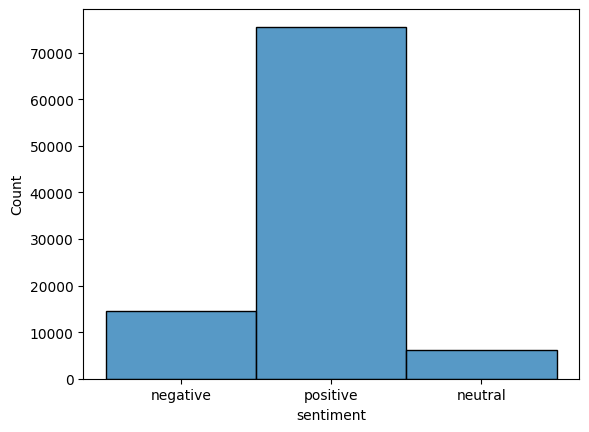

In [5]:
sns.histplot(data=df, x='sentiment')

In [14]:
def count_words(text):
    """Compte le nombre de mots de manière plus précise"""
    if pd.isna(text) or text == '':
        return 0
    # Nettoyer et compter
    words = str(text).strip().split()
    return len(words)

df1['nb_mots'] = df1['text'].apply(count_words)

# Statistiques détaillées
print("Statistiques des mots par avis:")
print(f"Moyenne: {df1['nb_mots'].mean():.2f} mots")
print(f"Médiane: {df1['nb_mots'].median():.0f} mots")
print(f"Min: {df1['nb_mots'].min()} mots")
print(f"Max: {df1['nb_mots'].max()} mots")
print(f"\nAvis vides (0 mots): {(df1['nb_mots'] == 0).sum()}")

Statistiques des mots par avis:
Moyenne: 26.95 mots
Médiane: 27 mots
Min: 0 mots
Max: 1590 mots

Avis vides (0 mots): 6685


In [ ]:
# def detect_language(text):
#     try:
#         return detect(text)
#     except:
#         return 'unknown'

# # Appliquer sur ta colonne d'avis
# df1['lang'] = df1['text'].apply(detect_language)

In [15]:
# df['lang'].value_counts()

In [9]:
def prepar(data,da):
    results=[]
    da['date'] = pd.to_datetime(da['date'])
    da.set_index('date', inplace=True)
    dates=list(data['month'].unique())
    for d in dates:
        L=data[data["month"]==d]
        avg_p=(len(L[L["sentiment"]=="positive"]))/len(L)
        avg_n=len(L[L["sentiment"]=="negative"])/len(L)
        avg_t=len(L[L["sentiment"]=="neutral"])/len(L)

        #avg_neg=-1*len(L[L["sentiment"]=="negative"])/len(L)
        results.append({
            "date":d,
            "review_count":len(L),
            "Avg_positive":avg_p*100,
            "Avg_negative":avg_n*100,
            "Avg_neutral":avg_t*100
        })
    return pd.DataFrame(results)
sentiments=prepar(df,df2)

In [13]:
def prepar(data):
    results=[]
    cities=list(data['city'].unique())
    for c in cities:
        L=data[data["city"]==c]
        avg_p=(len(L[L["sentiment_label"]=="positive"]))/len(L)
        avg_n=len(L[L["sentiment_label"]=="negative"])/len(L)
        avg_t=len(L[L["sentiment_label"]=="neutral"])/len(L)
        #avg_neg=-1*len(L[L["sentiment_label"]=="negative"])/len(L)
        results.append({
            "city":c,
            "review_count":len(L),
            "Avg_positive":avg_p*100,
            "Avg_negative":avg_n*100,
            "Avg_neutral":avg_t*100
        })
    return pd.DataFrame(results)
nuite=prepar(df)

In [10]:
sentiments["date"]=pd.to_datetime(sentiments["date"])

C:\Users\masta\AppData\Local\Temp\ipykernel_23140\3452520374.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sentiments["date"]=pd.to_datetime(sentiments["date"])


In [14]:
df2

,TES,MRE,Total Arrivées,Nuité,Taux d'occupation
date,,,,,
2010-01-01,291608.0,216485.0,508093.0,NaN,NaN
2010-02-01,327017.0,214346.0,541363.0,NaN,NaN
2010-03-01,437338.0,234940.0,672278.0,NaN,NaN
2010-04-01,432338.0,232737.0,665075.0,NaN,NaN
2010-05-01,430974.0,241339.0,672313.0,NaN,NaN
...,...,...,...,...,...
2025-02-01,761377.0,634800.0,1396177.0,1797178.0,50.0
2025-03-01,768739.0,583272.0,1352011.0,1754640.0,40.0
2025-04-01,966724.0,698077.0,1664801.0,2463774.0,57.0


In [15]:
all=pd.merge(sentiments,df2,on="date",how="outer")
all

,date,review_count,Avg_positive,Avg_negative,Avg_neutral,TES,MRE,Total Arrivées,Nuité,Taux d'occupation
0,2010-01-01,12.0,58.333333,33.333333,8.333333,291608.0,216485.0,508093.0,NaN,NaN
1,2010-02-01,1.0,100.000000,0.000000,0.000000,327017.0,214346.0,541363.0,NaN,NaN
2,2010-03-01,NaN,NaN,NaN,NaN,437338.0,234940.0,672278.0,NaN,NaN
3,2010-04-01,1.0,100.000000,0.000000,0.000000,432338.0,232737.0,665075.0,NaN,NaN
4,2010-05-01,NaN,NaN,NaN,NaN,430974.0,241339.0,672313.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
181,2025-02-01,2086.0,82.214765,12.799616,4.985618,761377.0,634800.0,1396177.0,1797178.0,50.0
182,2025-03-01,2514.0,84.367542,10.580748,5.051710,768739.0,583272.0,1352011.0,1754640.0,40.0
183,2025-04-01,2792.0,82.987106,12.679083,4.333811,966724.0,698077.0,1664801.0,2463774.0,57.0
184,2025-05-01,4946.0,81.277800,14.092196,4.630004,NaN,NaN,154004.0,2305539.0,54.0


In [11]:
sentiments['date']=pd.to_datetime(sentiments['date'])

In [ ]:
sentiments.isnull().sum()

<Axes: >

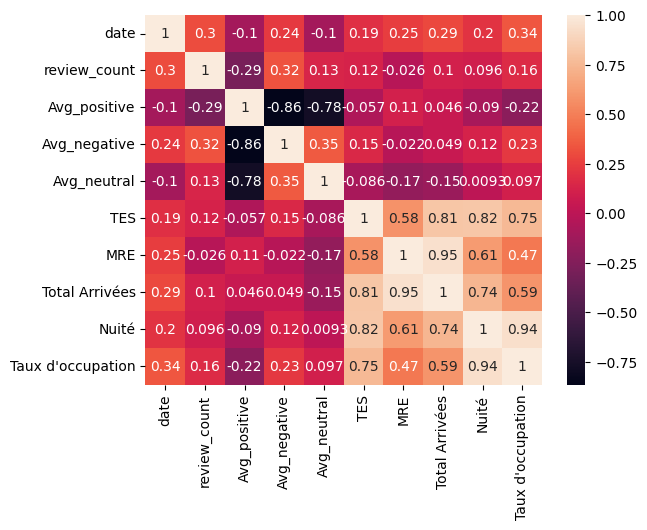

In [21]:
sns.heatmap(all.corr(),annot=True)

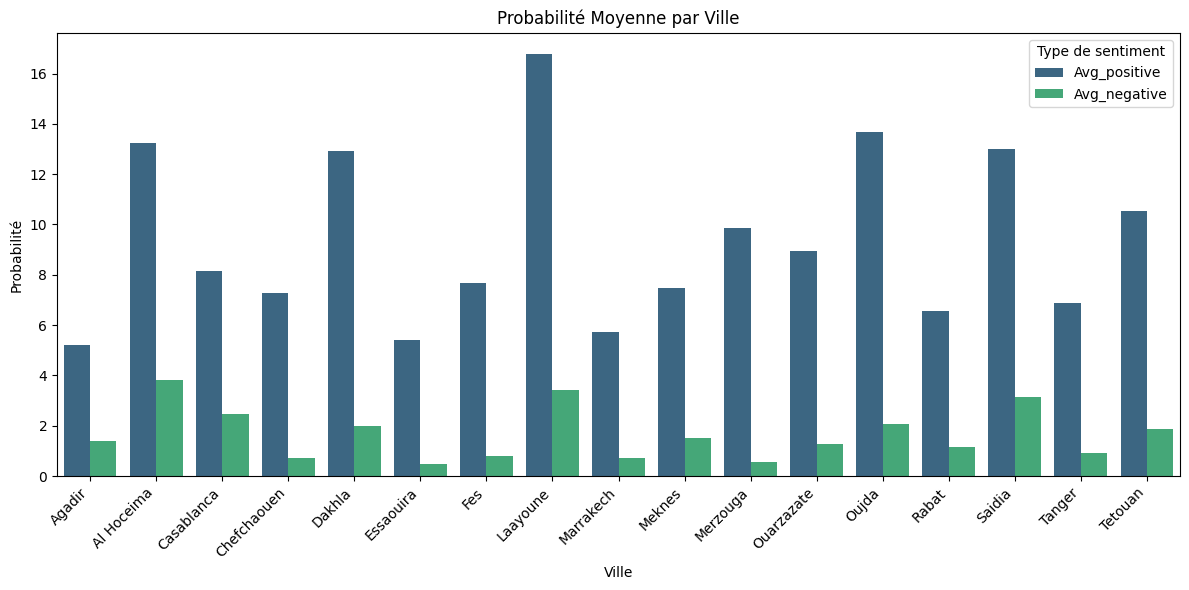

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Transformer les données au format long
nuite_long = pd.melt(nuite, id_vars=['city'], 
                     value_vars=['Avg_positive', 'Avg_negative'],
                     var_name='Sentiment', value_name='Probabilité')

# Créer l'histogramme groupé
plt.figure(figsize=(12, 6))
sns.barplot(data=nuite_long, x='city', y='Probabilité', hue='Sentiment', palette='viridis')
plt.xlabel('Ville')
plt.ylabel('Probabilité')
plt.title('Probabilité Moyenne par Ville')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Type de sentiment')
plt.tight_layout()
plt.show()

In [18]:
d=dict(df['sentiment_label'].value_counts())
print(int(d['negative']))

1296


In [19]:
def prepar(data):
    results=[]
    cities=list(data['city'].unique())
    for c in cities:
        L=data[data["city"]==c]
        d=dict(df['sentiment_label'].value_counts())
        avg_p=(len(L[L["sentiment_label"]=="positive"]))/int(d['positive'])
        avg_n=len(L[L["sentiment_label"]=="negative"])/int(d['negative'])
        #avg_neg=-1*len(L[L["sentiment_label"]=="negative"])/len(L)
        results.append({
            "city":c,
            "review_count":len(L),
            "Avg_positive":avg_p*100,
            "Avg_negative":avg_n*100,
        })
    return pd.DataFrame(results)
nuite1=prepar(df)

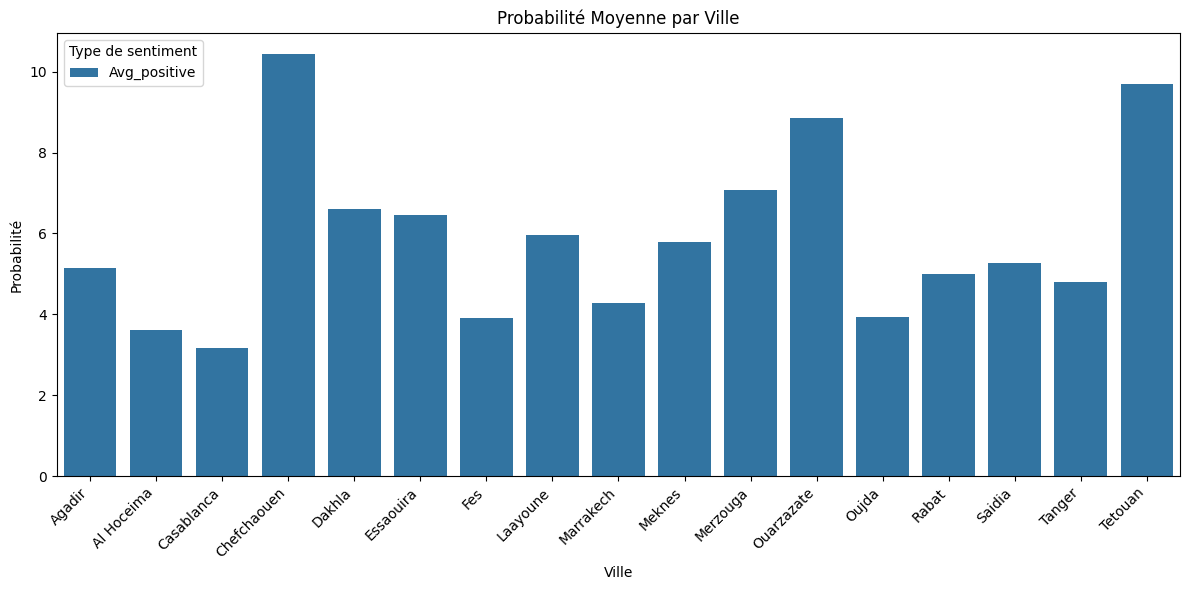

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Transformer les données au format long
nuite_long = pd.melt(nuite1, id_vars=['city'], 
                     value_vars=['Avg_positive'],
                     var_name='Sentiment', value_name='Probabilité')

# Créer l'histogramme groupé
plt.figure(figsize=(12, 6))
sns.barplot(data=nuite_long, x='city', y='Probabilité', hue='Sentiment')
plt.xlabel('Ville')
plt.ylabel('Probabilité')
plt.title('Probabilité Moyenne par Ville')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Type de sentiment')
plt.tight_layout()
plt.show()